In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [33]:
df_DL = pd.read_csv('../../datasets/DeliveryList.csv')
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5


In [34]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [35]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [36]:
df_DL.describe()

,바코드,입고수량,출고수량
count,1.499200e+04,15000.000000,15000.000000
mean,1.294839e+13,58.144533,7.205200
std,5.243929e+12,348.398250,19.819656
min,6.414100e+12,0.000000,0.000000
25%,8.801046e+12,0.000000,0.000000
50%,8.801047e+12,0.000000,1.000000
75%,1.880105e+13,0.000000,4.000000
max,2.880105e+13,9777.000000,308.000000


In [37]:
df_DL.describe(include=object)

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [38]:
df_DL['날짜_datetime'] = pd.to_datetime(df_DL['날짜'])

In [39]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           15000 non-null  object        
 1   상품명          15000 non-null  object        
 2   바코드          14992 non-null  float64       
 3   발주가능상태       15000 non-null  object        
 4   입고수량         15000 non-null  int64         
 5   카테고리         15000 non-null  object        
 6   출고수량         15000 non-null  int64         
 7   날짜_datetime  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 937.6+ KB


In [40]:
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [41]:
df_DL['날짜_datetime'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
14995    2019
14996    2019
14997    2019
14998    2019
14999    2019
Name: 날짜_datetime, Length: 15000, dtype: int64

In [45]:
df_DL['날짜_datetime_year']=df_DL['날짜_datetime'].dt.year
df_DL['날짜_datetime_month']=df_DL['날짜_datetime'].dt.month

In [44]:
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,날짜_datetime_year
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019


In [46]:
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum)

,출고수량
날짜_datetime_month,
5,19427
6,39397
7,40584
8,8670


<Axes: xlabel='날짜_datetime_month'>

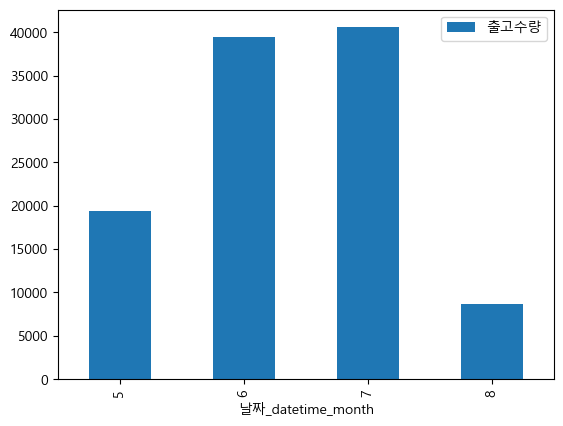

In [48]:
# 방법 1. 2차 데이터 사용시
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum).plot(kind='bar')

<Axes: xlabel='날짜_datetime_month', ylabel='출고수량'>

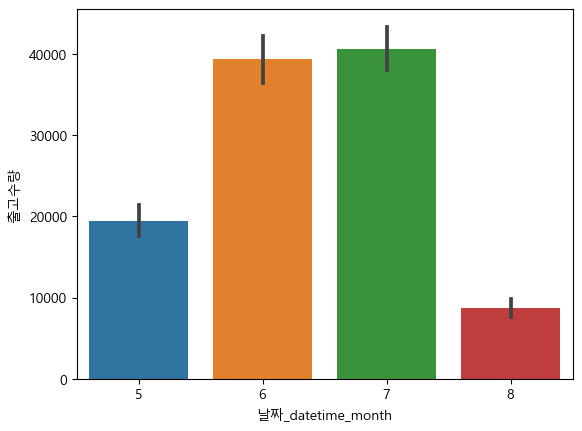

In [51]:
# 방법 2. 단순 시각화
sns.barplot(data=df_DL, x='날짜_datetime_month', y='출고수량', estimator=sum)

In [52]:
df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear

C:\Users\01-03\AppData\Local\Temp\ipykernel_9564\2556811622.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_DL['날짜_datetime_week'] = df_DL['날짜_datetime'].dt.weekofyear


<Axes: xlabel='날짜_datetime_week', ylabel='출고수량'>

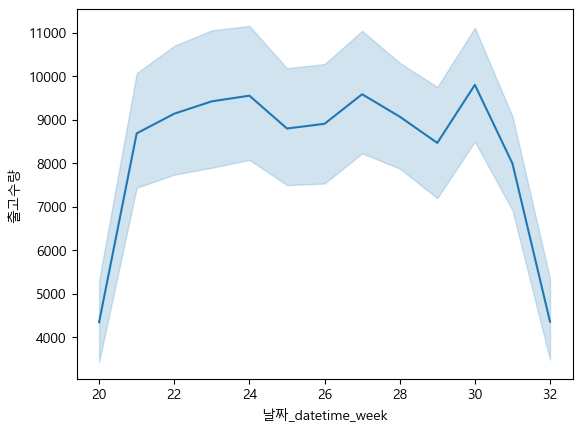

In [53]:
sns.lineplot(data=df_DL, x='날짜_datetime_week', y='출고수량', estimator=sum)